<a href="https://colab.research.google.com/github/MatsvanderSteen/London-Airbnb-price-prediction/blob/main/Modelling_ErrorAnalysis_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modellen NY


In [ ]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [ ]:
#df_NY = pd.read_csv('NY_Preprocessed_airbnblistings_ExternalFeatures_outlierdetected.csv', index_col=0)
df_LON = pd.read_csv('Preprocessed_airbnblistings_ExternalFeatures_outlierdetected_Finish.csv', index_col=0)

pd.set_option('display.max_columns', len(df_LON.columns)) # To view all columns
pd.set_option('display.max_rows', 150)

In [ ]:
df_NY.head()

,source,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,...,parking,outdoor_space,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,
739333866230665371,city scrape,unknown,unknown,unknown,0.0,1.0,1.0,0.0,Fort Hamilton,40.614310,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no reviews,no reviews
572612125615500056,city scrape,within an hour,100%,90-99%,1.0,2.0,1.0,0.0,Sunset Park,40.639520,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2-3 years,2-8 weeks
45267941,city scrape,within an hour,100%,50-89%,0.0,3.0,1.0,1.0,Morris Heights,40.850030,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,no reviews,no reviews
838141198693830649,city scrape,a few days or more,0-49%,0-49%,0.0,7.0,1.0,1.0,East Harlem,40.798718,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,no reviews,no reviews
1082660771919357919,city scrape,within a day,50-89%,0-49%,0.0,5.0,1.0,0.0,South Slope,40.668012,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,no reviews,no reviews


In [ ]:
df_LON.set_index('id', inplace=True)
#df_NY.set_index('id', inplace=True) # The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one# The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one

In [ ]:
#df_NY.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
df_LON.drop(['neighbourhood_cleansed','weighted_sentiment','total_distance_to_attractions','stations_within_1km'], axis=1, inplace=True)

In [ ]:
#transformed_df_NY = pd.get_dummies(df_NY)
transformed_df_LON = pd.get_dummies(df_LON)

In [ ]:
#transformed_df_NY['price'] = np.log(transformed_df_NY['price'] + 1)  # Adding 1 to avoid log(0)
transformed_df_LON['price'] = np.log(transformed_df_LON['price'] + 1)  # Adding 1 to avoid log(0)

In [ ]:
#transformed_df_NY.drop(['time_since_last_review_6-12 months','review_scores_checkin_5/5','review_scores_checkin_no reviews','latitude','longitude','air_conditioning','gym','time_since_last_review_0-2 weeks','time_since_last_review_2-8 weeks'], axis=1, inplace=True)
transformed_df_LON.drop(['time_since_last_review_6-12 months','review_scores_checkin_5/5','review_scores_checkin_no reviews','latitude','longitude'], axis=1, inplace=True)

In [ ]:
#transformed_df_NY.drop(['time_since_last_review_6-12 months','review_scores_checkin_5/5','review_scores_checkin_no reviews','latitude','longitude','air_conditioning','gym','time_since_last_review_0-2 weeks','time_since_last_review_2-8 weeks'], axis=1, inplace=True)
transformed_df_LON.drop(['time_since_last_review_6-12 months','review_scores_checkin_5/5','review_scores_checkin_no reviews','latitude','longitude'], axis=1, inplace=True)

KeyError: "['time_since_last_review_6-12 months', 'review_scores_checkin_5/5', 'review_scores_checkin_no reviews', 'latitude', 'longitude'] not found in axis"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splits features (X) en labels (y) voor Londen
X_london = transformed_df_LON.drop(columns=['price'])  # Vervang 'label' met je eigen target kolomnaam
y_london = transformed_df_LON['price']

# Splits features (X) en labels (y) voor New York
#X_ny = transformed_df_NY.drop(columns=['price'])
#y_ny = transformed_df_NY['price']

# (Optioneel) Splits Londen data in training/validation sets
X_train, X_val, y_train, y_val = train_test_split(X_london, y_london, test_size=0.2, random_state=42)

# (Optioneel) Normaliseer data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
#X_ny_scaled = scaler.transform(X_ny)

# Print vormen van de data om te controleren
print("Train data:", X_train.shape, y_train.shape)
print("Validation data:", X_val.shape, y_val.shape)
#print("NY test data:", X_ny.shape, y_ny.shape)


Train data: (49100, 86) (49100,)
Validation data: (12275, 86) (12275,)


In [ ]:
#Linear Regression



# Stap 3: Splitsen van de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 4: Maak het model aan en train het
model = LinearRegression()
model.fit(X_train, y_train)

#mse_scorer = make_scorer(mean_squared_error, squared=False)  # RMSE door squared=False
# Stap 5: Voorspel met het model
y_pred = model.predict(X_ny_scaled)

# Stap 6: Evalueer het model
mse = mean_squared_error(y_ny, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_ny, y_pred)  # R^2 Score
mae = mean_absolute_error(y_ny, y_pred)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

NameError: name 'X_train' is not defined

In [ ]:

# Stap 2: Splits features (X) en labels (y)
X = transformed_df_LON.drop(columns=['price'])  # Vervang 'label' met de kolomnaam van je target
y = transformed_df_LON['price']

#X_test = transformed_df_NY.drop(columns=['price'])
#y_test = transformed_df_NY['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 3: Normaliseer de data met StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Pas fit_transform toe op de training data
X_test_scaled = scaler.transform(X_test)        # Alleen transform op test data

In [ ]:
X_test_subset = X_test.iloc[:, :86]  # Selecteer de eerste 100 kolommen
X_train_subset = X_train.iloc[:, :86]  # Selecteer de eerste 100 kolommen

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61375 entries, 1126718007114818431 to 864578923978183308
Data columns (total 86 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   host_is_superhost                       61375 non-null  float64
 1   host_listings_count                     61375 non-null  float64
 2   host_has_profile_pic                    61375 non-null  float64
 3   host_identity_verified                  61375 non-null  float64
 4   accommodates                            61375 non-null  int64  
 5   bathrooms                               61375 non-null  float64
 6   bedrooms                                61375 non-null  float64
 7   beds                                    61375 non-null  float64
 8   minimum_nights                          61375 non-null  int64  
 9   maximum_nights                          61375 non-null  int64  
 10  availability_90                 

In [ ]:
# Stap 4: Maak het model aan en train het
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Stap 5: Voorspel met het model op New York data
y_pred = model.predict(X_test_scaled)

# Stap 6: Evalueer het model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R^2 Score
mae = mean_absolute_error(y_test, y_pred)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Squared Error (MSE): 0.2200
Root Mean Squared Error (RMSE): 0.4691
R^2 Score: 0.6395
Mean Absolute Error (MAE): 0.3545


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Stap 2: Splits features (X) en labels (y)
#X_train = transformed_df_LON.drop(columns=['price'])  # Vervang 'label' met de kolomnaam van je target
#y_train = transformed_df_LON['price']

#X_test = transformed_df_NY.drop(columns=['price'])
#y_test = transformed_df_NY['price']

# Stap 3: Normaliseer de data met StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)  # Pas fit_transform toe op de training data
#X_test_scaled = scaler.transform(X_test)        # Alleen transform op test data

# Step 4: Use the best hyperparameters for the Random Forest model
# Replace these with your pre-determined best hyperparameters
best_params = {
    'n_estimators': 200,  # Aantal bomen
    'max_depth': 10,  # Diepte van de bomen
    'min_samples_split': 8,  # Minimaal aantal samples voor een split
    'min_samples_leaf': 4,    # Minimaal aantal samples in een blad
    'max_features': 30  # Het aantal te gebruiken features per splitsing
}

# Create the Random Forest Regressor model with the best hyperparameters
model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Step 5: Train the model
model.fit(X_train_scaled, y_train)

# Step 6: Predict on the test data
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Squared Error (MSE): 0.1843
Root Mean Squared Error (RMSE): 0.4293
R² Score: 0.6982
Mean Absolute Error (MAE): 0.3239


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb


# Stap 2: Splits features (X) en labels (y)
#X_train = transformed_df_LON.drop(columns=['price'])  # Vervang 'label' met de kolomnaam van je target
#y_train = transformed_df_LON['price']

#X_test = transformed_df_NY.drop(columns=['price'])
#y_test = transformed_df_NY['price']

# Stap 3: Normaliseer de data met StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)  # Pas fit_transform toe op de training data
#X_test_scaled = scaler.transform(X_test)        # Alleen transform op test data

# Step 4: Use the best hyperparameters for XGBoost model
# Replace these with your pre-determined best hyperparameters
best_params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 150,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 7
}

# Step 5: Create and train the XGBoost model with the best hyperparameters
model = xgb.XGBRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    min_child_weight=best_params['min_child_weight'],
)

# Train the model
model.fit(X_train_scaled, y_train)

# Step 6: Predict on the test data
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Squared Error (MSE): 0.1459
Root Mean Squared Error (RMSE): 0.3820
R² Score: 0.7610
Mean Absolute Error (MAE): 0.2834


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import lightgbm as lgb

# Stap 2: Splits features (X) en labels (y)
#X_train = transformed_df_LON.drop(columns=['price'])  # Vervang 'label' met de kolomnaam van je target
#y_train = transformed_df_LON['price']

#X_test = transformed_df_NY.drop(columns=['price'])
#y_test = transformed_df_NY['price']

# Stap 3: Normaliseer de data met StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)  # Pas fit_transform toe op de training data
#X_test_scaled = scaler.transform(X_test)        # Alleen transform op test data

best_params = {
    'num_leaves': 120,
    'min_child_samples': 30,
    'learning_rate': 0.01,
    'n_estimators': 1000,
    'objective': 'regression',
    'metric': 'mse',
    'verbosity': -1
}

# Step 5: Create and train the LightGBM model with the best hyperparameters
model = lgb.LGBMRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    num_leaves=best_params['num_leaves'],
    min_child_samples=best_params['min_child_samples'],
    objective=best_params['objective'],
    metric=best_params['metric'],
    verbosity=best_params['verbosity']
)

# Train the model
model.fit(X_train_scaled, y_train)

# Step 6: Predict on the test data
y_pred = model.predict(X_test_scaled)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Squared Error (MSE): 0.1503
Root Mean Squared Error (RMSE): 0.3877
R² Score: 0.7538
Mean Absolute Error (MAE): 0.2886


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Stap 2: Splits features (X) en labels (y)
#X_train = transformed_df_LON.drop(columns=['price'])  # Vervang 'label' met de kolomnaam van je target
#y_train = transformed_df_LON['price']

#X_test = transformed_df_NY.drop(columns=['price'])
#y_test = transformed_df_NY['price']

# Stap 3: Normaliseer de data met StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)  # Pas fit_transform toe op de training data
#X_test_scaled = scaler.transform(X_test)        # Alleen transform op test data

# Step 4: Create and train the SVR model
# Adjust hyperparameters if needed
model = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma=0.01)
model.fit(X_train_scaled, y_train)

# Step 5: Predict on the test data
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Squared Error (MSE): 0.1754
Root Mean Squared Error (RMSE): 0.4188
R² Score: 0.7127
Mean Absolute Error (MAE): 0.3079


# Modellen


In [ ]:

import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [ ]:
#df_NY = pd.read_csv('NY_Preprocessed_airbnblistings_ExternalFeatures_outlierdetected.csv', index_col=0)
df = pd.read_csv('Preprocessed_airbnblistings_ExternalFeatures_outlierdetected_Finish.csv', index_col=0)

pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 150)

In [ ]:
df.set_index('id', inplace=True) # The id will be used as the index, as this could be useful in future e.g. if a separate dataset containing reviews for each property is linked to this one

In [ ]:
df.drop(['latitude','longitude',], axis=1, inplace=True)

In [ ]:
BaseFeatures = df.drop(columns=['weighted_sentiment','total_distance_to_attractions','stations_within_1km'])


In [ ]:
     stations_within_1km total_distance_to_attractions

SyntaxError: invalid syntax (<ipython-input-6-8d6eaaa4ae8b>, line 1)

In [ ]:
transformed_df = pd.get_dummies(BaseFeatures)


In [ ]:
numerical_columns = ['accommodates', 'availability_90','beds','bedrooms', 'bathrooms','host_days_active', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price']


In [ ]:

transformed_df['price'] = np.log(transformed_df['price'] + 1)  # Adding 1 to avoid log(0)

In [ ]:
transformed_df.drop(['review_scores_checkin_5/5','review_scores_checkin_no reviews',], axis=1, inplace=True)

In [ ]:
Best_Features_RF = ['price','room_type_Entire home/apt','bathrooms','accommodates','neighbourhood_cleansed_Westminster','availability_90','host_days_active','host_listings_count','neighbourhood_cleansed_Kensington and Chelsea','bedrooms','minimum_nights']

In [ ]:
Best_Features_XGBoost = ['price','room_type_Entire home/apt','bathrooms','accommodates','neighbourhood_cleansed_Westminster','host_response_time_unknown','tv','neighbourhood_cleansed_Kensington and Chelsea','bedrooms','neighbourhood_cleansed_Camden','time_since_last_review_2-6 months']

In [ ]:
subset_df = transformed_df[Best_Features_XGBoost]


In [ ]:
selected_columns = transformed_df.iloc[:, [102, 103]]

In [ ]:
y_test.head()

,price
id,
1083233382652955123,3.931826
38396162,4.709530
949990116826442959,3.931826
1177392110418138090,5.525453
49088993,5.351858


In [ ]:
transformed_df = transformed_df.drop(transformed_df.columns[[102,103]], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

# Sample 10% of the data
Sampled_Data = transformed_df.sample(frac=0.1, random_state=42)  # Set random_state for reproducibility

# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Separating X and y
X_Sample = Sampled_Data.drop('price', axis=1)
y_Sample = Sampled_Data.price

X_Sample = pd.DataFrame(scaler.fit_transform(X_Sample), columns=list(X_Sample.columns))

# Separating X and y
#X_Subset = subset_df.drop('price', axis=1)
#y_Subset = subset_df.price

#X_Subset = pd.DataFrame(scaler.fit_transform(X_Subset), columns=list(X_Subset.columns))

# Scaling
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))


In [ ]:
X.isna().sum()

,0
host_is_superhost,0
host_listings_count,0
host_has_profile_pic,0
host_identity_verified,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
minimum_nights,0
maximum_nights,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the StandardScaler
scaler = StandardScaler()

# Step 2: Fit the scaler on the training data and transform the features
X_train_scaled = scaler.fit_transform(X_train)  # Scale X_train using training data's mean and std

# Step 3: Transform the test data using the same scaler (do not fit again on the test set)
X_test_scaled = scaler.transform(X_test)  # Use the same scaling parameters from X_train



In [ ]:
#Linear Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Stap 3: Splitsen van de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 4: Maak het model aan en train het
model = LinearRegression()
model.fit(X_train, y_train)

#mse_scorer = make_scorer(mean_squared_error, squared=False)  # RMSE door squared=False
y_pred_LR = model.predict(X_test)

# Stap 6: Evalueer het model
mse = mean_squared_error(y_test, y_pred_LR)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_LR)  # R^2 Score
mae = mean_absolute_error(y_test, y_pred_LR)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Squared Error (MSE): 0.1665
Root Mean Squared Error (RMSE): 0.4080
R^2 Score: 0.7273
Mean Absolute Error (MAE): 0.3028


In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Stap 5: Splitsen van de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 6: Maak het Random Forest model aan en train het
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Stap 7: Voorspel met het model
y_pred = model.predict(X_test)

# Stap 8: Evalueer het model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Optioneel: Print de feature importances
#importances = model.feature_importances_
#feature_importances = pd.DataFrame(importances, index=X_Subset.columns, columns=['importance']).sort_values('importance', ascending=False)
#print("\nFeature Importances:")
#print(feature_importances)

Mean Squared Error (MSE): 0.1155
Root Mean Squared Error (RMSE): 0.3399
R^2 Score: 0.8108
Mean Absolute Error (MAE): 0.2422


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Stap 5: Splitsen van de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 6: Beste hyperparameters (als voorbeeld, vervang met jouw GridSearch resultaten)
best_params = {
    'n_estimators': 200,  # Aantal bomen
    'max_depth': 10,  # Diepte van de bomen
    'min_samples_split': 8,  # Minimaal aantal samples voor een split
    'min_samples_leaf': 4,    # Minimaal aantal samples in een blad
    'max_features': 30  # Het aantal te gebruiken features per splitsing
}

# Maak het Random Forest model aan met de beste hyperparameters
model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Stap 7: Train het model
model.fit(X_train, y_train)

# Stap 8: Voorspel met het model
y_pred_RF = model.predict(X_test)

# Stap 9: Evalueer het model
mse = mean_squared_error(y_test, y_pred_RF)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_RF)
mae = mean_absolute_error(y_test, y_pred_RF)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Squared Error (MSE): 0.1631
Root Mean Squared Error (RMSE): 0.4038
R^2 Score: 0.7328
Mean Absolute Error (MAE): 0.3011


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Stap 5: Splitsen van de data in trainings- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 6: Maak het Random Forest model aan en train het

#model = RandomForestRegressor(n_estimators=100, random_state=42)
model = RandomForestRegressor(random_state=42)
#model.fit(X_train, y_train)

# Set up the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 125, 150, 200],      # Number of trees
    'max_depth': [8, 9, 10],      # Depth of each tree
    'min_samples_split': [8, 9],      # Min samples needed to split a node
    'min_samples_leaf': [3, 4],      # Min samples needed in a leaf
    'max_features': [20, 30]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extract the best model and print the best parameters
best_rf = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Stap 7: Voorspel met het model
#y_pred = model.predict(X_test)
y_pred = best_rf.predict(X_test)

# Stap 8: Evalueer het model
mse = mean_squared_error(y_test, y_pred
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

# Optioneel: Print de feature importances
#importances = model.feature_importances_
#feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
#print("\nFeature Importances:")
#print(feature_importances)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found:  {'max_depth': 10, 'max_features': 30, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}
Mean Squared Error (MSE): 0.1493
Root Mean Squared Error (RMSE): 0.3864
R^2 Score: 0.7554
Mean Absolute Error (MAE): 0.2859


In [ ]:
#LightGBM

In [ ]:
pip install lightgbm


In [ ]:
import lightgbm as lgb

# Stap 3: Splitsen van de Data in Train- en Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 4: LightGBM Model Trainen
lgb_train = lgb.Dataset(X_train, y_train)  # Maak een LightGBM dataset
params = {
    'objective': 'regression',  # Doel is regressie
    'metric': 'mse',  # Evaluatie metric
    'verbosity': -1,  # Geen output tijdens training
}

lgb_model = lgb.train(params, lgb_train, num_boost_round=100)  # Train het model

# Voorspellingen maken
y_pred = lgb_model.predict(X_test)

# Stap 8: Evalueer het model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Mean Squared Error (MSE): 0.1146
Root Mean Squared Error (RMSE): 0.3385
R^2 Score: 0.8123
Mean Absolute Error (MAE): 0.2483


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Stap 3: Splitsen van de Data in Train- en Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 4: Trainen van het model met de beste hyperparameters
best_params = {
    'num_leaves': 120,
    'min_child_samples': 30,
    'learning_rate': 0.01,
    'n_estimators': 1000,
    'objective': 'regression',
    'metric': 'mse',
    'verbosity': -1
}

# Maak een LightGBM dataset en train het model
lgb_model = lgb.LGBMRegressor(**best_params)
lgb_model.fit(X_train, y_train)

# Voorspellingen maken
y_pred_LGBM = lgb_model.predict(X_test)

# Stap 8: Evalueer het model
mse = mean_squared_error(y_test, y_pred_LGBM)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_LGBM)
mae = mean_absolute_error(y_test, y_pred_LGBM)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Mean Squared Error (MSE): 0.1155
Root Mean Squared Error (RMSE): 0.3399
R^2 Score: 0.8108
Mean Absolute Error (MAE): 0.2480


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Voorbeeld dataset splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiseren van het LightGBM model
lgb_model = lgb.LGBMRegressor()

# Instellen van de hyperparameter-zoekruimte
param_grid = {
    'num_leaves': [80, 120, 160],
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [1000, 1500, 2000],
    'min_child_samples': [10, 20, 40]
}

# GridSearchCV instellen
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=5,   # 5-fold cross-validation
    scoring='neg_mean_squared_error',   # Gebruik MSE als de scoringsmethode
    n_jobs=-1,   # Parallel gebruik van alle processors
    verbose=1
)

# Grid search uitvoeren
grid_search.fit(X_train, y_train)

# Beste hyperparameters
print("Beste hyperparameters:", grid_search.best_params_)

# Model met beste parameters evalueren op test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# # Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Beste hyperparameters: {'learning_rate': 0.03, 'min_child_samples': 20, 'n_estimators': 2000, 'num_leaves': 120}
Mean Squared Error (MSE): 0.0928
Root Mean Squared Error (RMSE): 0.3046
R^2 Score: 0.8480
Mean Absolute Error (MAE): 0.2180


In [ ]:
#XGBoost

In [ ]:
import xgboost as xgb

# Stap 3: Splitsen van de Data in Train- en Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stap 4: XGBoost Model Trainen
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror')  # Definieer het model
xgboost_model.fit(X_train, y_train)  # Train het model

# Voorspellingen maken
y_pred = xgboost_model.predict(X_test)

# Stap 5: Model Evalueren
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# # Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Squared Error (MSE): 0.1090
Root Mean Squared Error (RMSE): 0.3302
R^2 Score: 0.8214
Mean Absolute Error (MAE): 0.2400


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Stap 3: Splitsen van de Data in Train- en Testsets#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Beste hyperparameters
best_params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 10,
    'n_estimators': 150,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 7
}

# Stap 4: XGBoost Model Trainen met beste hyperparameters
xgboost_model = xgb.XGBRegressor(**best_params)  # Initialiseer het model met de beste parameters
xgboost_model.fit(X_train, y_train)  # Train het model

# Voorspellingen maken
y_pred_XGB = xgboost_model.predict(X_test)

# Stap 5: Model Evalueren
mse = mean_squared_error(y_test, y_pred_XGB)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_XGB)
mae = mean_absolute_error(y_test, y_pred_XGB)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Squared Error (MSE): 0.1143
Root Mean Squared Error (RMSE): 0.3381
R^2 Score: 0.8128
Mean Absolute Error (MAE): 0.2460


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Stap 3: Splitsen van de Data in Train- en Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid = {
    'colsample_bytree': [0.6, 0.7, 0.8],
    'n_estimators': [100, 125, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [8, 10],
    'subsample': [0.6, 0.7],
    'min_child_weight': [6, 7]
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=xgboost_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # or any other relevant metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Extract the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

print("Best Parameters:", best_params)

# Stap 5: Model Evalueren
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# # Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 7, 'n_estimators': 150, 'subsample': 0.7}
Mean Squared Error (MSE): 0.0988
Root Mean Squared Error (RMSE): 0.3143
R^2 Score: 0.8382
Mean Absolute Error (MAE): 0.2266


In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgboost_model.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
time_since_last_review_no reviews,0.000000
review_scores_value_no reviews,0.000000
review_scores_location_no reviews,0.000000
source_city scrape,0.000000
review_scores_communication_no reviews,0.000301
review_scores_checkin_0-4/5,0.000953
review_scores_rating_no reviews,0.000973
time_since_first_review_1-2 years,0.000979
review_scores_communication_0-4/5,0.000997
review_scores_communication_4.5/5,0.001013


In [ ]:
from sklearn.svm import SVR

# Stap 3: Splitsen van de Data in Train- en Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stel de beste hyperparameters in
best_params = {
    'kernel': 'rbf',  # vervang met jouw beste waarde
    'C': 1,          # vervang met jouw beste waarde
    'gamma': 0.01, # vervang met jouw beste waarde
    'epsilon': 0.1    # vervang met jouw beste waarde
}

# Stap 4: SVR Model Trainen
svr_model = SVR(**best_params)  # Je kunt ook andere kernels proberen zoals 'linear' of 'poly'
svr_model.fit(X_train, y_train)

# Voorspellingen maken
y_pred_SVR = svr_model.predict(X_test)

# Stap 5: Model Evalueren
mse = mean_squared_error(y_test, y_pred_SVR)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_SVR)
mae = mean_absolute_error(y_test, y_pred_SVR)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 0.1317
Root Mean Squared Error (RMSE): 0.3629
R^2 Score: 0.7842
Mean Absolute Error (MAE): 0.2630


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Sample data (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a pipeline with scaling (recommended for SVR)
pipeline = make_pipeline(StandardScaler(), SVR())

# Define the hyperparameter grid for SVR
param_grid = {
    'svr__C': [0.1, 1, 10],          # Regularization parameter
    'svr__epsilon': [0.01, 0.1, 1],   # Margin of tolerance
    'svr__gamma': [0.001, 0.01],  # Kernel coefficient
    'svr__kernel': ['rbf','linear']  # Kernel type
}

# Define the GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

# Evaluate the best model on the test set (replace X_test and y_test with actual test data)
y_pred = grid_search.predict(X_test)

# Stap 5: Model Evalueren
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Resultaten afdrukken
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

# Nieuwe sectie

In [ ]:
import pandas as pd
import os

df = pd.read_csv('Preprocessed_airbnblistings_ExternalFeatures_outlierdetected-2.csv', index_col=0)

pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 150)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.info()

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
#from keras import models, layers, optimizers, regularizers
#from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)

In [ ]:
# Read CSV file
file_path1 = 'Stations_London.csv'  # Replace with your file path
raw_df_stations = pd.read_csv(file_path1)

In [ ]:
import pandas as pd
import re
import string

# Step 1: Drop unnecessary columns
columns_to_drop = ['NAME', 'EASTING','NORTHING','LINES','NETWORK','Zone','OBJECTID','FID']
df_stations = raw_df_stations.drop(columns=columns_to_drop)

In [ ]:
df_stations.head()

In [ ]:
Sampled_Data1 = df.sample(frac=0.1, random_state=42)  # Set random_state for reproducibility

In [ ]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np

# Radius instellen in kilometer
radius_km = 1.0

# Functie om aantal stations binnen 1 km te berekenen
def count_stations_nearby(airbnb_coords, df_stations, radius_km):
    count = 0
    for _, stations in df_stations.iterrows():
        station_coords = (stations['y'], stations['x'])
        # Bereken de afstand tussen de Airbnb en het station
        distance = geodesic(airbnb_coords, station_coords).kilometers
        # Controleer of de afstand binnen de opgegeven straal ligt
        if distance <= radius_km:
            count += 1
    return count



In [ ]:
# Voeg de nieuwe feature toe aan de airbnb_df
df['stations_within_1km'] = df.apply(
    lambda row: count_stations_nearby((row['latitude'], row['longitude']), df_stations, radius_km), axis=1
)


In [ ]:
df.describe()

In [ ]:
# Exporteren naar CSV-bestand
df.to_csv('Preprocessed_airbnblistings_ExternalFeatures_outlierdetected_Finish.csv', index=True)

# Controleer of het bestand correct is opgeslagen
print("Preprocessed_airbnblistings_ExternalFeatures scores zijn opgeslagen in Preprocessed_airbnblistings_ExternalFeatures.csv")

# Error analysis


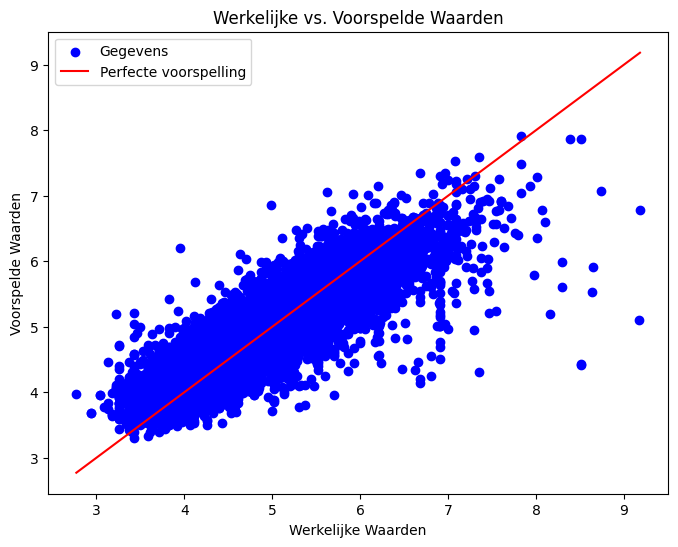

In [ ]:
#Linear Regression

import matplotlib.pyplot as plt
import seaborn as sns

# Werkelijke vs voorspelde waarden plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_LR, color='blue', label='Gegevens')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfecte voorspelling')
plt.title('Werkelijke vs. Voorspelde Waarden')
plt.xlabel('Werkelijke Waarden')
plt.ylabel('Voorspelde Waarden')
plt.legend()
plt.show()


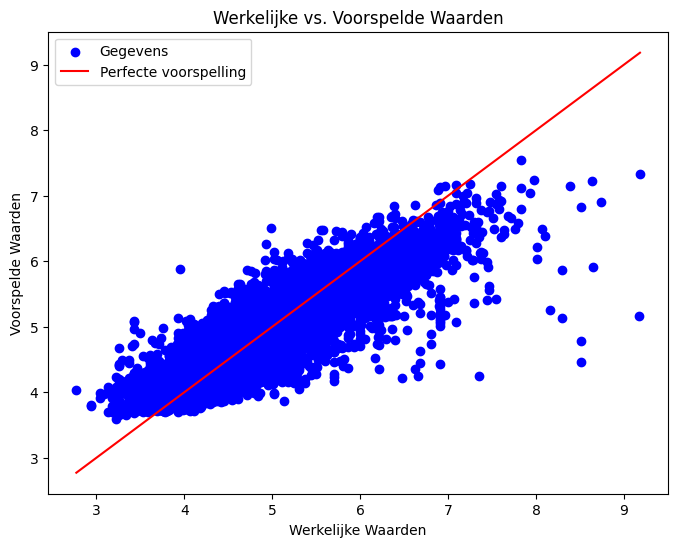

In [ ]:
#Random Forest

import matplotlib.pyplot as plt
import seaborn as sns

# Werkelijke vs voorspelde waarden plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RF, color='blue', label='Gegevens')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfecte voorspelling')
plt.title('Werkelijke vs. Voorspelde Waarden')
plt.xlabel('Werkelijke Waarden')
plt.ylabel('Voorspelde Waarden')
plt.legend()
plt.show()

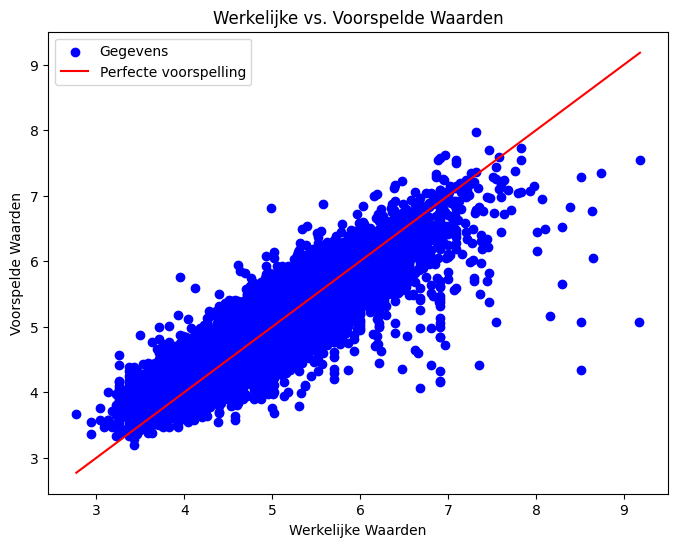

In [ ]:
#Support Vector Regression

import matplotlib.pyplot as plt
import seaborn as sns

# Werkelijke vs voorspelde waarden plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_SVR, color='blue', label='Gegevens')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfecte voorspelling')
plt.title('Actual vs. Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted')
plt.legend()
plt.show()

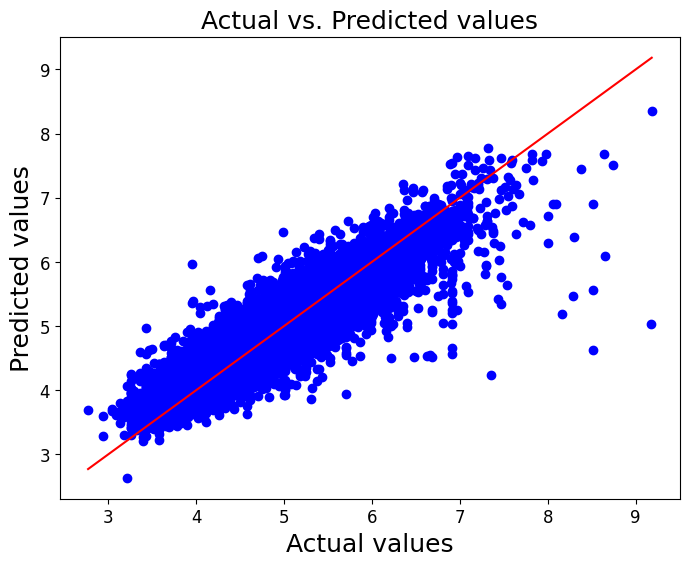

In [ ]:
#XGBoost

import matplotlib.pyplot as plt
import seaborn as sns

# Werkelijke vs voorspelde waarden plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_XGB, color='blue', label='Log-transformed listing prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Best fit line')
plt.title('Actual vs. Predicted values', fontsize=18)  # Verhoog de lettergrootte van de titel
plt.xlabel('Actual values', fontsize=18)  # Verhoog de lettergrootte van het x-label
plt.ylabel('Predicted values', fontsize=18)  # Verhoog de lettergrootte van het y-label
plt.tick_params(axis='both', labelsize=12)  # Verhoog de lettergrootte van de waarden op de assen

plt.savefig('Error_Analysis_XGBoost.png', format='png', dpi=300)  # opslaan als PNG-bestand met hoge resolutie (300 dpi)
plt.show()

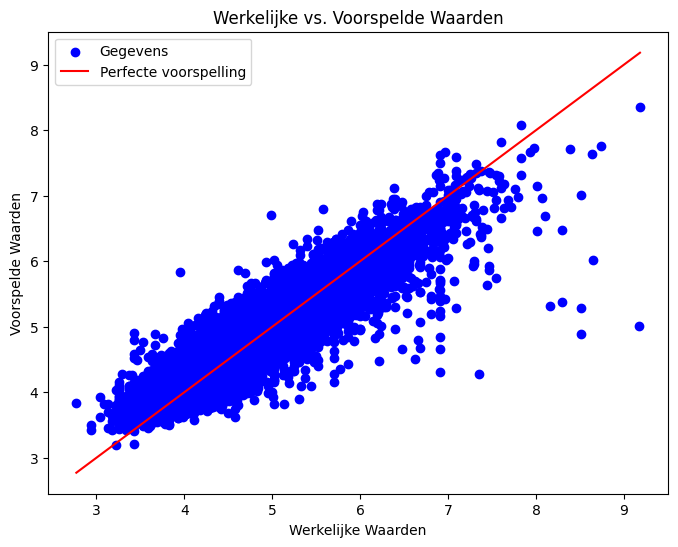

In [ ]:
#LightGBM

import matplotlib.pyplot as plt
import seaborn as sns

# Werkelijke vs voorspelde waarden plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_LGBM, color='blue', label='Gegevens')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfecte voorspelling')
plt.title('Werkelijke vs. Voorspelde Waarden')
plt.xlabel('Werkelijke Waarden')
plt.ylabel('Voorspelde Waarden')
plt.legend()
plt.show()

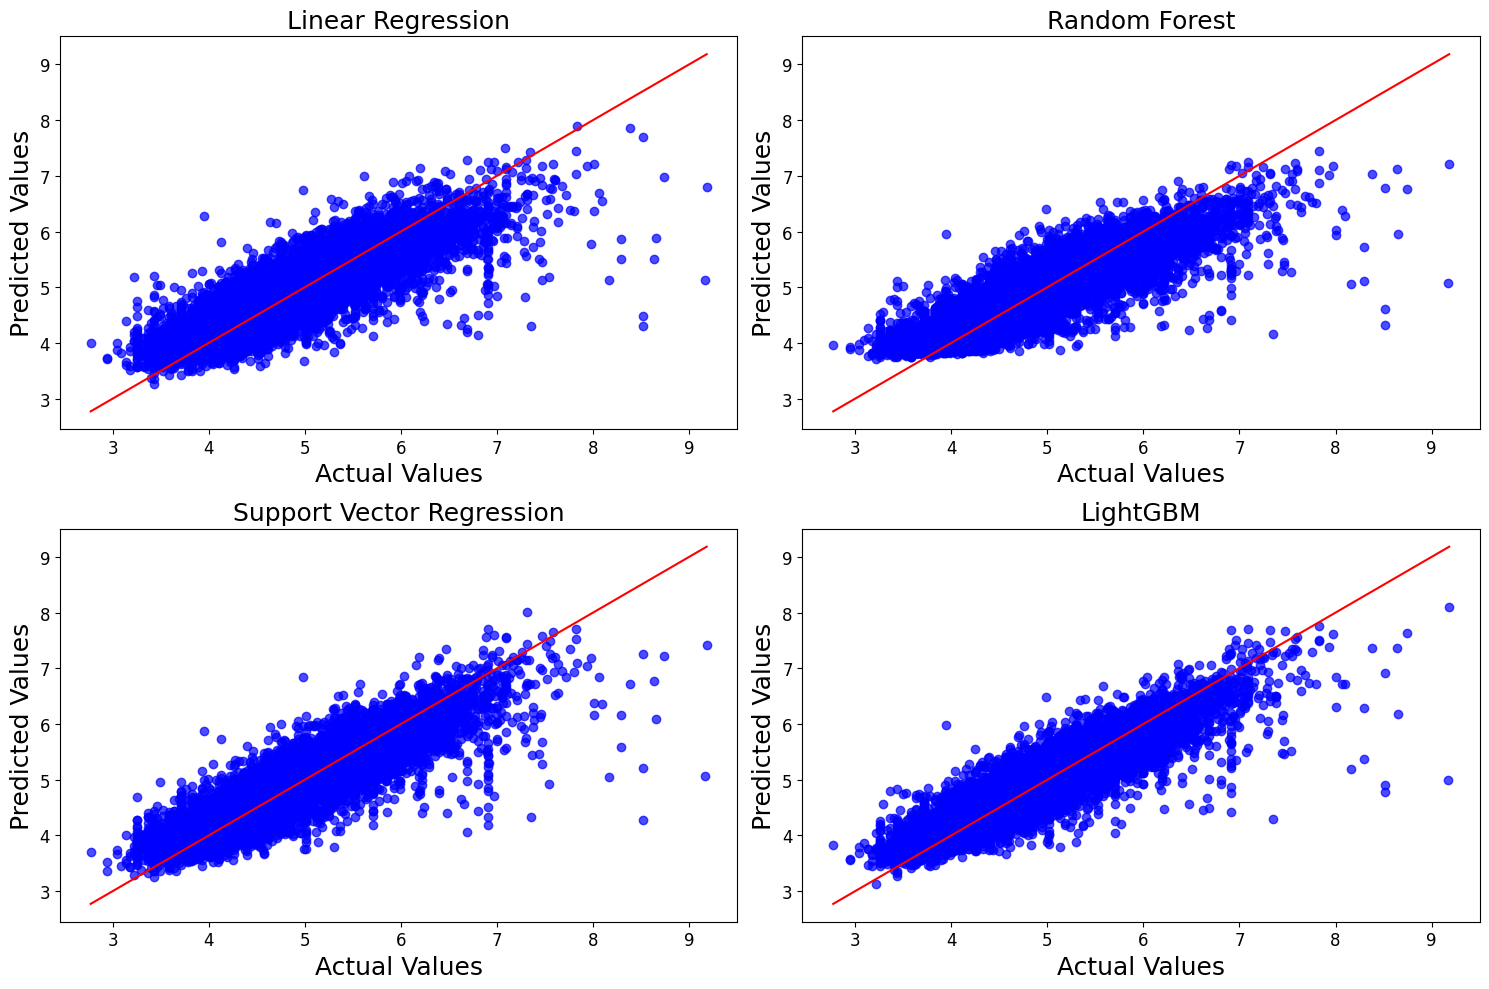

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with subplots (2 rows, 3 columns, total 5 plots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array to easily loop through
axes = axes.flatten()

# Plot each model's Actual vs Predicted values
models = [y_pred_LR, y_pred_RF, y_pred_SVR, y_pred_LGBM]
model_names = ['Linear Regression', 'Random Forest', 'Support Vector Regression','LightGBM']

for i in range(4):
    ax = axes[i]
    ax.scatter(y_test, models[i], label='Log-tranformed listing prices', alpha=0.7, color='blue')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Best fit line')
    ax.set_title(model_names[i], fontsize=18)  # Increase title font size
    ax.set_xlabel('Actual Values', fontsize=18)  # Increase x-axis label font size
    ax.set_ylabel('Predicted Values', fontsize=18)  # Increase y-axis label font size
    ax.tick_params(axis='both', labelsize=12)  # Increase tick label size


# Remove the last unused subplot (the empty one)
#axes[4].axis('off')

# Adjust layout
plt.tight_layout()
plt.savefig('Error_Analysis_4models.png', format='png', dpi=300)  # opslaan als PNG-bestand met hoge resolutie (300 dpi)
plt.show()


# Price imputation


In [ ]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import time

In [ ]:
df = pd.read_csv('PRICE_Preprocessed_airbnblistings_ExternalFeatures_outlierdetected.csv', index_col=0)

pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_rows', 150)

In [ ]:
df.set_index('id', inplace=True) # The id will be used as th reviews for each property is linked to this one

In [ ]:
df.drop(['latitude','longitude',], axis=1, inplace=True)

In [ ]:
BaseFeatures = df.drop(columns=['weighted_sentiment', 'total_distance_to_attractions'])

In [ ]:
transformed_df = pd.get_dummies(BaseFeatures)

In [ ]:
transformed_df['price'] = np.log(transformed_df['price'] + 1)  # Adding 1 to avoid log(0)

In [ ]:
transformed_df.drop(['review_scores_checkin_5/5','review_scores_checkin_no reviews',], axis=1, inplace=True)

In [ ]:
BaseFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93420 entries, 1126718007114818431 to 864578923978183308
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   source                       93420 non-null  object 
 1   host_response_time           93420 non-null  object 
 2   host_response_rate           93420 non-null  object 
 3   host_acceptance_rate         93420 non-null  object 
 4   host_is_superhost            93420 non-null  float64
 5   host_listings_count          93420 non-null  float64
 6   host_has_profile_pic         93420 non-null  float64
 7   host_identity_verified       93420 non-null  float64
 8   neighbourhood_cleansed       93420 non-null  object 
 9   property_type                93420 non-null  object 
 10  room_type                    93420 non-null  object 
 11  accommodates                 93420 non-null  int64  
 12  bathrooms                    93420 non-null  flo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming `transformed_df` is the original DataFrame with 90,000 instances
# Step 1: Split the labeled data into 40,000 for training and 20,000 for testing
labeled_data = transformed_df[transformed_df['price'].notna()]  # Rows with 'price' available
unlabeled_data = transformed_df[transformed_df['price'].isna()]  # Rows with missing 'price'

# Split the labeled data (60,000) into training and test sets (40,000 and 20,000)
X_labeled = labeled_data.drop(columns=['price'])
y_labeled = labeled_data['price']

X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# Step 2: Extract features for the unlabeled data (30,000)
X_unlabeled = unlabeled_data.drop(columns=['price'])

# Step 3: Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Semi-supervised learning loop
max_iterations = 10  # Maximum iterations for adding confident predictions
confidence_threshold = 0.8  # Confidence threshold for predictions
iteration = 0

while iteration < max_iterations and not X_unlabeled.empty:
    print(f"Iteration {iteration + 1}")

    # Train the model on the labeled data (40,000)
    model.fit(X_train, y_train)

    # Predict the missing values for the unlabeled data
    y_unlabeled_pred = model.predict(X_unlabeled)

    # Calculate confidence scores based on prediction variance from Random Forest
    if hasattr(model, 'estimators_'):
        confidences = np.std([tree.predict(X_unlabeled) for tree in model.estimators_], axis=0)
        confidences = 1 - confidences / np.max(confidences)  # Normalize confidences
    else:
        confidences = np.ones_like(y_unlabeled_pred)  # For models without variance measure

    # Select confident predictions
    confident_indices = confidences >= confidence_threshold
    if confident_indices.sum() == 0:
        break  # Stop if no confident predictions

    # Add confident predictions to the labeled data
    X_new = X_unlabeled[confident_indices]
    y_new = y_unlabeled_pred[confident_indices]

    # Update the training data with the newly labeled instances
    X_train = pd.concat([X_train, X_new])
    y_train = pd.concat([y_train, pd.Series(y_new, index=X_new.index)])

    # Remove confident predictions from the unlabeled data
    X_unlabeled = X_unlabeled[~confident_indices]

    iteration += 1
    print(f"Iteration {iteration}: Added {len(X_new)} new labeled instances.")

# Step 5: Impute the remaining missing values in the unlabeled data (if any remain)
if not X_unlabeled.empty:
    y_unlabeled_pred = model.predict(X_unlabeled)
    y_unlabeled_pred = pd.Series(y_unlabeled_pred, index=X_unlabeled.index)

# Step 6: Combine the original labeled data and the imputed unlabeled data
imputed_prices = pd.concat([y_train, y_unlabeled_pred])
transformed_df['price'] = imputed_prices

# Step 7: Output the DataFrame with imputed values
df_imputed = transformed_df.copy()
print("Imputation completed! Dataset is ready for further modeling.")


Iteration 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 1: Added 11018 new labeled instances.
Iteration 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 2: Added 14556 new labeled instances.
Iteration 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 3: Added 2212 new labeled instances.
Iteration 4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 4: Added 820 new labeled instances.
Iteration 5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 5: Added 432 new labeled instances.
Iteration 6


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 6: Added 326 new labeled instances.
Iteration 7


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 7: Added 94 new labeled instances.
Iteration 8


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 8: Added 100 new labeled instances.
Iteration 9


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 9: Added 46 new labeled instances.
Iteration 10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 10: Added 91 new labeled instances.
Imputation completed! Dataset is ready for further modeling.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12275 entries, 1083233382652955123 to 960627793686700586
Columns: 121 entries, host_is_superhost to time_since_last_review_no reviews
dtypes: bool(93), float64(22), int64(6)
memory usage: 3.8 MB


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Step 1: Split the data into labeled and unlabeled subsets
labeled_data = transformed_df[transformed_df['price'].notna()]  # Rows with price available
unlabeled_data = transformed_df[transformed_df['price'].isna()]  # Rows with missing price

# Step 2: Extract features and target for the labeled subset
X_labeled = labeled_data.drop(columns=['price'])
y_labeled = labeled_data['price']

# Step 3: Extract features for the unlabeled subset
X_unlabeled = unlabeled_data.drop(columns=['price'])

# Step 4: Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Semi-supervised learning loop
max_iterations = 10  # Maximum iterations to add confident predictions
confidence_threshold = 0.8  # Threshold to decide confident predictions
iteration = 0

while iteration < max_iterations and not X_unlabeled.empty:
    # Train the model on the labeled data
    model.fit(X_labeled, y_labeled)

    # Predict for the unlabeled data
    y_unlabeled_pred = model.predict(X_unlabeled)

    # Calculate confidence scores (based on variance of predictions from Random Forest)
    if hasattr(model, 'estimators_'):
        confidences = np.std(
            [tree.predict(X_unlabeled) for tree in model.estimators_], axis=0
        )
        confidences = 1 - confidences / np.max(confidences)  # Normalize confidences
    else:
        confidences = np.ones_like(y_unlabeled_pred)  # For models without variance measure

    # Select rows where the confidence is above the threshold
    confident_indices = confidences >= confidence_threshold
    if confident_indices.sum() == 0:
        break  # Stop if no confident predictions

    # Add confident predictions to the labeled data
    X_new = X_unlabeled[confident_indices]
    y_new = y_unlabeled_pred[confident_indices]

    X_labeled = pd.concat([X_labeled, X_new])
    y_labeled = pd.concat([y_labeled, pd.Series(y_new, index=X_new.index)])

    # Remove confident predictions from the unlabeled data
    X_unlabeled = X_unlabeled[~confident_indices]

    iteration += 1
    print(f"Iteration {iteration}: Added {len(X_new)} new labeled instances.")

# Step 5: Predict the remaining missing values (if any unlabeled data remains)
if not X_unlabeled.empty:
    y_unlabeled_pred = model.predict(X_unlabeled)
    y_unlabeled_pred = pd.Series(y_unlabeled_pred, index=X_unlabeled.index)

# Step 6: Combine all predictions (labeled and imputed)
imputed_prices = pd.concat([y_labeled, y_unlabeled_pred])
df['price'] = imputed_prices

# Output the DataFrame with imputed values
df_imputed = df.copy()
print("Imputation completed! Dataset is ready for further modeling.")import numpy as np


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 1: Added 19785 new labeled instances.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 2: Added 8989 new labeled instances.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 3: Added 1089 new labeled instances.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 4: Added 313 new labeled instances.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 5: Added 246 new labeled instances.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 6: Added 141 new labeled instances.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 7: Added 45 new labeled instances.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 8: Added 27 new labeled instances.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 9: Added 46 new labeled instances.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

Iteration 10: Added 34 new labeled instances.
Imputation completed! Dataset is ready for further modeling.
